In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Data/house_price.csv')
df.head()

,date,street,city,statezip,country,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   street         4600 non-null   object 
 2   city           4600 non-null   object 
 3   statezip       4600 non-null   object 
 4   country        4600 non-null   object 
 5   price          4600 non-null   float64
 6   bedrooms       4600 non-null   int64  
 7   bathrooms      4600 non-null   int64  
 8   sqft_living    4600 non-null   int64  
 9   sqft_lot       4600 non-null   int64  
 10  floors         4600 non-null   int64  
 11  waterfront     4600 non-null   int64  
 12  view           4600 non-null   int64  
 13  condition      4600 non-null   int64  
 14  sqft_above     4600 non-null   int64  
 15  sqft_basement  4600 non-null   int64  
 16  yr_built       4600 non-null   int64  
 17  yr_renovated   4600 non-null   int64  
dtypes: float

In [6]:
df['city'].nunique()
# 44 unique city data are available


44

In [7]:
# df['price'].apply(lambda x:'{:.2f}'.format(x))

new_df = df.drop(['date','street','city','statezip','country'],axis=1)
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,2.384000e+06,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,3.420000e+05,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,4.200000e+05,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,5.500000e+05,4,2,1940,10500,1,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,6360,1,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3,2,1460,7573,2,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3,2,3010,7014,2,0,0,3,3010,0,2009,0
4598,2.034000e+05,4,2,2090,6630,1,0,0,3,1070,1020,1974,0


In [8]:
new_df.dtypes

price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

<Axes: >

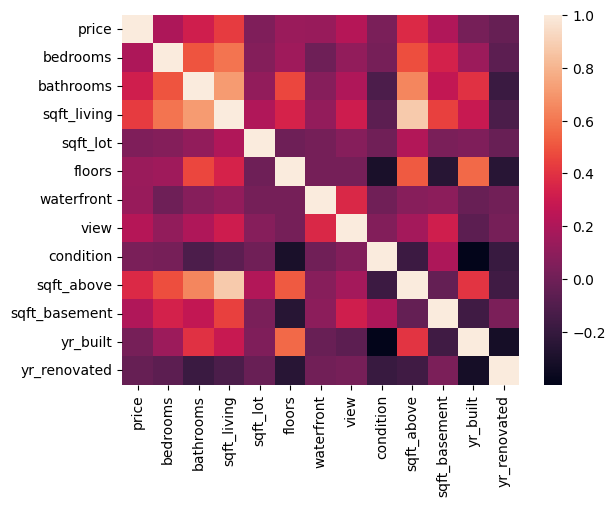

In [9]:
sns.heatmap(new_df.corr())

In [10]:
cor_metrix = new_df.corr()
cor_metrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.317229,0.430410,0.050451,0.137125,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.498491,0.594884,0.068819,0.157433,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.317229,0.498491,1.000000,0.711253,0.109521,0.463729,0.071806,0.203389,-0.118819,0.649091,0.270301,0.394516,-0.185970
sqft_living,0.430410,0.594884,0.711253,1.000000,0.210538,0.340993,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.109521,0.210538,1.000000,-0.005114,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.137125,0.157433,0.463729,0.340993,-0.005114,1.000000,0.017955,0.021116,-0.306464,0.517319,-0.253308,0.562218,-0.247150
waterfront,0.135648,-0.003483,0.071806,0.117616,0.017241,0.017955,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.203389,0.311009,0.073907,0.021116,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.118819,-0.062826,0.000558,-0.306464,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.649091,0.876443,0.216455,0.517319,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [11]:
cor_metrix[cor_metrix['price']>0.10]

# we will  ignore this column " yr_renovated  , yr_built "

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.317229,0.430410,0.050451,0.137125,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.498491,0.594884,0.068819,0.157433,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.317229,0.498491,1.000000,0.711253,0.109521,0.463729,0.071806,0.203389,-0.118819,0.649091,0.270301,0.394516,-0.185970
sqft_living,0.430410,0.594884,0.711253,1.000000,0.210538,0.340993,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
floors,0.137125,0.157433,0.463729,0.340993,-0.005114,1.000000,0.017955,0.021116,-0.306464,0.517319,-0.253308,0.562218,-0.247150
waterfront,0.135648,-0.003483,0.071806,0.117616,0.017241,0.017955,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.203389,0.311009,0.073907,0.021116,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
sqft_above,0.367570,0.484705,0.649091,0.876443,0.216455,0.517319,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426
sqft_basement,0.210427,0.334165,0.270301,0.447206,0.034842,-0.253308,0.097501,0.321602,0.200632,-0.038723,1.000000,-0.161675,0.043125


In [12]:
columns_to_be_training = list(cor_metrix[cor_metrix['price']>0.10].index)
columns_to_be_training


['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement']

In [13]:
filter_data = new_df[columns_to_be_training]
filter_data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
0,313000.0,3,1,1340,1,0,0,1340,0
1,2384000.0,5,2,3650,2,0,4,3370,280
2,342000.0,3,2,1930,1,0,0,1930,0
3,420000.0,3,2,2000,1,0,0,1000,1000
4,550000.0,4,2,1940,1,0,0,1140,800


In [14]:
# set x and y variables
x = filter_data.drop('price',axis=1)
y  = filter_data[['price']]

In [15]:
# splitting the dataset
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [159]:
from sklearn.tree import DecisionTreeRegressor

In [160]:
dtr = DecisionTreeRegressor()

In [163]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [164]:
dtr.score(x_train,y_train)

0.9800239493124815

In [165]:
dtr.score(x_test,y_test)

-7.558092177212691

In [215]:
pred1 = dtr.predict(x_train)

In [216]:
r2_score(y_train,pred1)

0.9800239493124815

### Hyperparameter turning

In [179]:
from sklearn.model_selection import GridSearchCV

In [182]:
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeClassifier instance
dtree = DecisionTreeRegressor()

# Create a GridSearchCV instance
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model)
best_model = grid_search.best_estimator_



c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, 

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [186]:
pred = best_model.predict(x_test)
#getting prediction by hyperparametertuned data

In [206]:
x_train_pred = best_model.predict(x_train)
# prediction on training data

In [210]:
best_model.score(x_train,y_train)
# r2_score(y_train,x_train_pred)

# accuracy on trainin data


0.1959083728434614

In [200]:
best_model.score(x_test,y_test['price'])
# r2_score(y_test['price'],pred)

# accuracy on test data

0.41242803220883084